# 초기 설정

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1. PassengerId : 승객 ID, 고유 식별번호

### 2. Survived : 생존여부, label

In [19]:
print(df_train['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [23]:
# 결측치 확인
print( df_train['Survived'].isnull().sum() )
print( df_test['Survived'].isnull().sum() )

0


KeyError: 'Survived'

<AxesSubplot:xlabel='Survived', ylabel='count'>

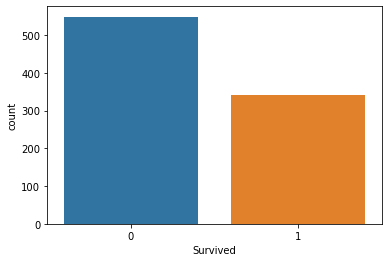

In [18]:
# 생존자 비교, 사망자가 더 많음
print()
sns.countplot(x='Survived', data = df_train)

### 3. Pclass : 객실 등급
0 : 사망, 1 : 생존

In [24]:
# 결측치 확인
print( df_train['Pclass'].isnull().sum() )
print( df_test['Pclass'].isnull().sum() )

0
0


<AxesSubplot:xlabel='Pclass', ylabel='count'>

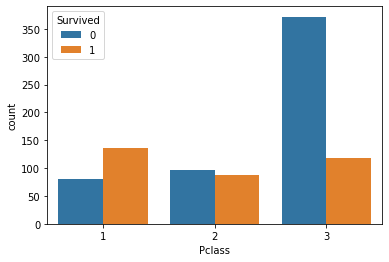

In [17]:
# 객실등급 별 생존율
# 1등급은 생존률이 높고, 2등급은 비슷하나 사망율이 조금 높음. 3등급은 사망률이 압도적으로 높음을 알 수 있음
sns.countplot(x='Pclass', hue='Survived', data = df_train)

data std is 14.93
data std is 14.16


AttributeError: module 'scipy.stats' has no attribute 'ttest'

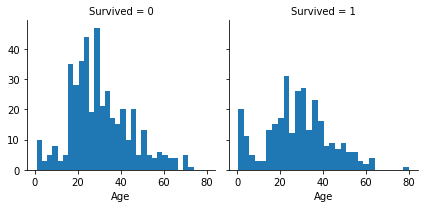

In [27]:
# valid_features 함수 실행 : age 탐색
valid_features(df_train[df_train['Age'] > 0], 'Age', distribution_check=True)